# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [4]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("winequality_edited.csv")
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium


In [5]:
df.tail(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,High
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,Low
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,Medium


In [6]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'acidity_levels'],
      dtype='object')

### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [8]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

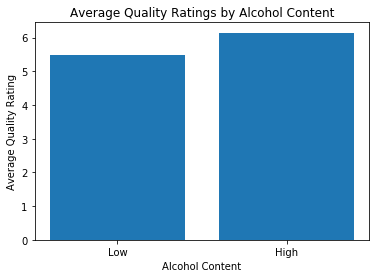

In [9]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [10]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'acidity_levels'],
      dtype='object')

In [12]:
# Use query to select each group and get its mean quality
median2 = df["residual_sugar"].median()
sweet = df.query("residual_sugar >= {}".format(median2))
sour = df.query("residual_sugar < {}".format(median2))
mean_sweet_quality = sweet["quality"].mean()
mean_sour_quality = sour["quality"].mean()

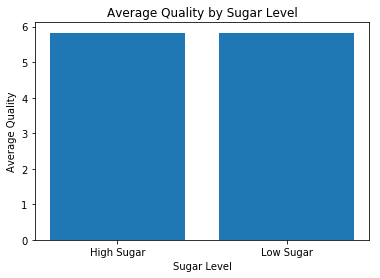

In [15]:
# Create a bar chart with proper labels
plt.bar([1, 2], [mean_sweet_quality, mean_sour_quality], 
                                    tick_label=["High Sugar", "Low Sugar"])
plt.title("Average Quality by Sugar Level")
plt.xlabel("Sugar Level")
plt.ylabel("Average Quality");

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [16]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'acidity_levels'],
      dtype='object')

In [21]:
# Use groupby to get the mean quality for each acidity level
wine_group = df.groupby("acidity_levels")["quality"].mean()
wine_group

acidity_levels
High               5.783343
Low                5.859593
Medium             5.850832
Moderately High    5.784540
Name: quality, dtype: float64

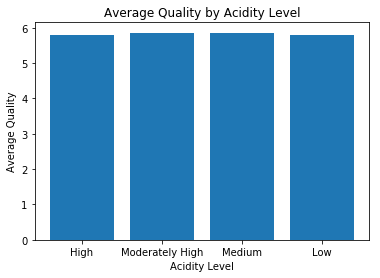

In [28]:
# Create a bar chart with proper labels
labels=["High", "Moderately High", "Medium", "Low"]
plt.bar([1, 2, 3, 4], wine_group, tick_label=labels)
#N/B: the varaible, wine group (as specified in the cell above)
                                #gives a series, hence the values for y-axis
plt.title("Average Quality by Acidity Level")
plt.xlabel("Acidity Level")
plt.ylabel("Average Quality");

### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function for this.

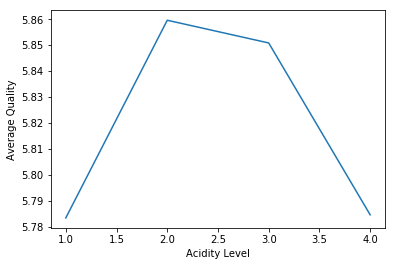

In [37]:
plt.plot([1, 2, 3, 4], wine_group)
plt.xlabel("Acidity Level")
plt.ylabel("Average Quality");

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?

My Take: The line chart helps us to clearly see the effect of slight changes that otherwise we would not be able to notice in the bar chart.